<a href="https://colab.research.google.com/github/shindejayesh987/Deep-Learning-Using-Pytorch/blob/main/Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from keras.models import Model

In [17]:
model = Model(inputs = x,outputs = [output1,output2])

In [18]:
from keras.layers import *

In [19]:
x = Input(shape = (3,))

In [20]:
hidden1 = Dense(128,activation = 'relu')(x)
hidden2 = Dense(64,activation = 'relu')(hidden1)


output1 = Dense(1,activation = 'linear')(hidden1)
output2 = Dense(1,activation = 'sigmoid')(hidden2)

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 128)                  512       ['input_1[0][0]']             
                                                                                                  
 dense_9 (Dense)             (None, 64)                   8256      ['dense_8[0][0]']             
                                                                                                  
 dense_10 (Dense)            (None, 1)                    129       ['dense_8[0][0]']             
                                                                                            

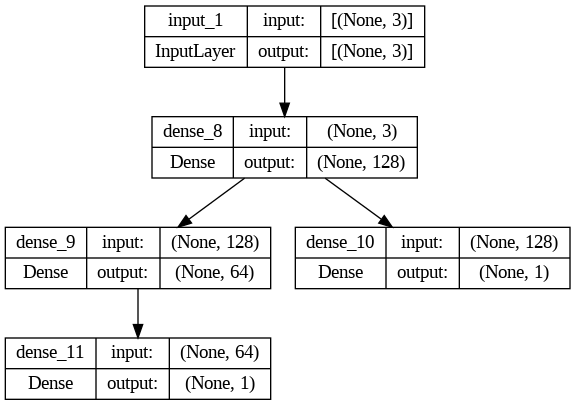

In [22]:
from keras.utils import plot_model
plot_model(model,show_shapes = True)

#Functional-Api multiple-input

In [23]:
from keras.models import Model
from keras.layers import *

In [24]:
inputA = Input(shape = (32,))
inputB = Input(shape = (128,))

In [25]:
x = Dense(8,activation = 'relu')(inputA)
x1 = Dense(4,activation = 'relu')(x)

In [26]:
y = Dense(64,activation = 'relu')(inputB)
y1 = Dense(32,activation = 'relu')(y)
y2 = Dense(4,activation = 'relu')(y1)

In [27]:
combined = concatenate([x1,y2])

In [28]:
z = Dense(2,activation = 'relu')(combined)
z = Dense(1,activation = 'linear')(z)

In [29]:
model = Model(inputs = [inputA,inputB],outputs = z)

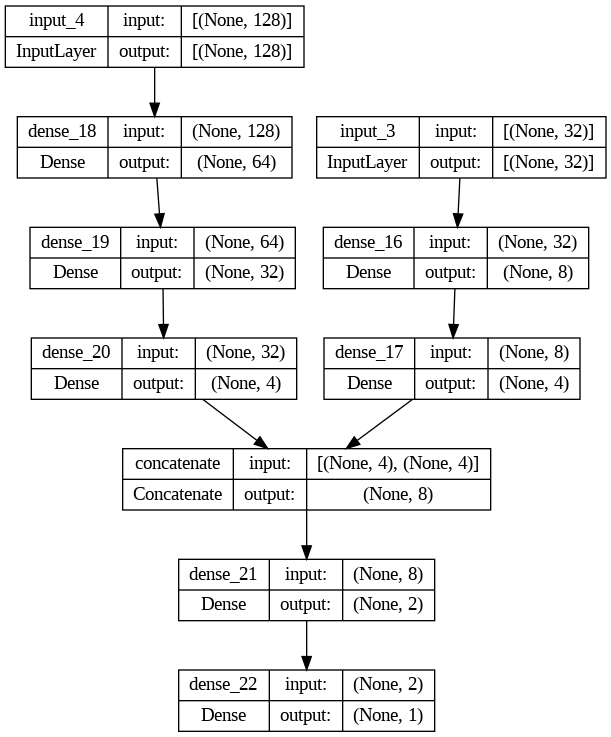

In [30]:
from keras.utils import plot_model
plot_model(model,show_shapes = True)

#UTK-Face_Age_vs_Gender

In [31]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [32]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
100% 331M/331M [00:13<00:00, 31.6MB/s]
100% 331M/331M [00:13<00:00, 26.2MB/s]


In [33]:
import zipfile
zip_ref = zipfile.ZipFile('/content/utkface-new.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [34]:
import pandas as pd
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

In [50]:
folder_path = '/content/utkface_aligned_cropped/UTKFace'

In [51]:
age =[]
gender = []
img_path = []
for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(file.split('_')[1])
  img_path.append(os.path.join(folder_path,file))


In [37]:
len(age)

23708

In [38]:
df = pd.DataFrame({'age':age,'gender':gender,'img_path':img_path})

In [39]:
df.shape

(23708, 3)

In [40]:
df.head()

,age,gender,img_path
0,2,1,/content/utkface_aligned_cropped/UTKFace/2_1_1...
1,28,1,/content/utkface_aligned_cropped/UTKFace/28_1_...
2,50,0,/content/utkface_aligned_cropped/UTKFace/50_0_...
3,72,0,/content/utkface_aligned_cropped/UTKFace/72_0_...
4,52,0,/content/utkface_aligned_cropped/UTKFace/52_0_...


In [41]:
train_df = df.sample(frac = 1,random_state = 0).iloc[:20000]

test_df = df.sample(frac = 1,random_state = 0).iloc[20000:]

In [42]:
train_df.shape

(20000, 3)

In [43]:
test_df.shape

(3708, 3)

In [52]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )
test_datagen = ImageDataGenerator(rescale = 1./255)

In [53]:
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    directory=folder_path,
                                                    x_col = 'img_path',
                                                    y_col = ['age','gender'],
                                                    target_size = (200,200),
                                                    class_mode = 'multi_output',
                                                    )

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                    directory=folder_path,
                                                    x_col = 'img_path',
                                                    y_col = ['age','gender'],
                                                    target_size = (200,200),
                                                    class_mode = 'multi_output',
                                                  )

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [54]:
from keras.models import Model
from keras.layers import *
from keras.applications import VGG16

In [55]:
vggnet = VGG16(include_top = False,input_shape = (200,200,3))

58889256/58889256 [==============================] - 2s 0us/step


In [56]:
vggnet.trainable = False

output = vggnet.layers[-1].output

flatten = Flatten()(output)

dense1 = Dense(512,activation = 'relu')(flatten)
dense2 = Dense(512,activation = 'relu')(flatten)

dense3 = Dense(512,activation = 'relu')(dense1)
dense4 = Dense(512,activation = 'relu')(dense2)

output1 = Dense(1,activation = 'linear',name ='age')(dense3)
output2 = Dense(1,activation = 'sigmoid',name ='gender')(dense4)

In [57]:
model = Model(inputs = vggnet.input,outputs = [output1,output2])

In [58]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 200, 200, 64)         1792      ['input_5[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 200, 200, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)         0         ['block1_conv2[0][0]']        
                                                                                            

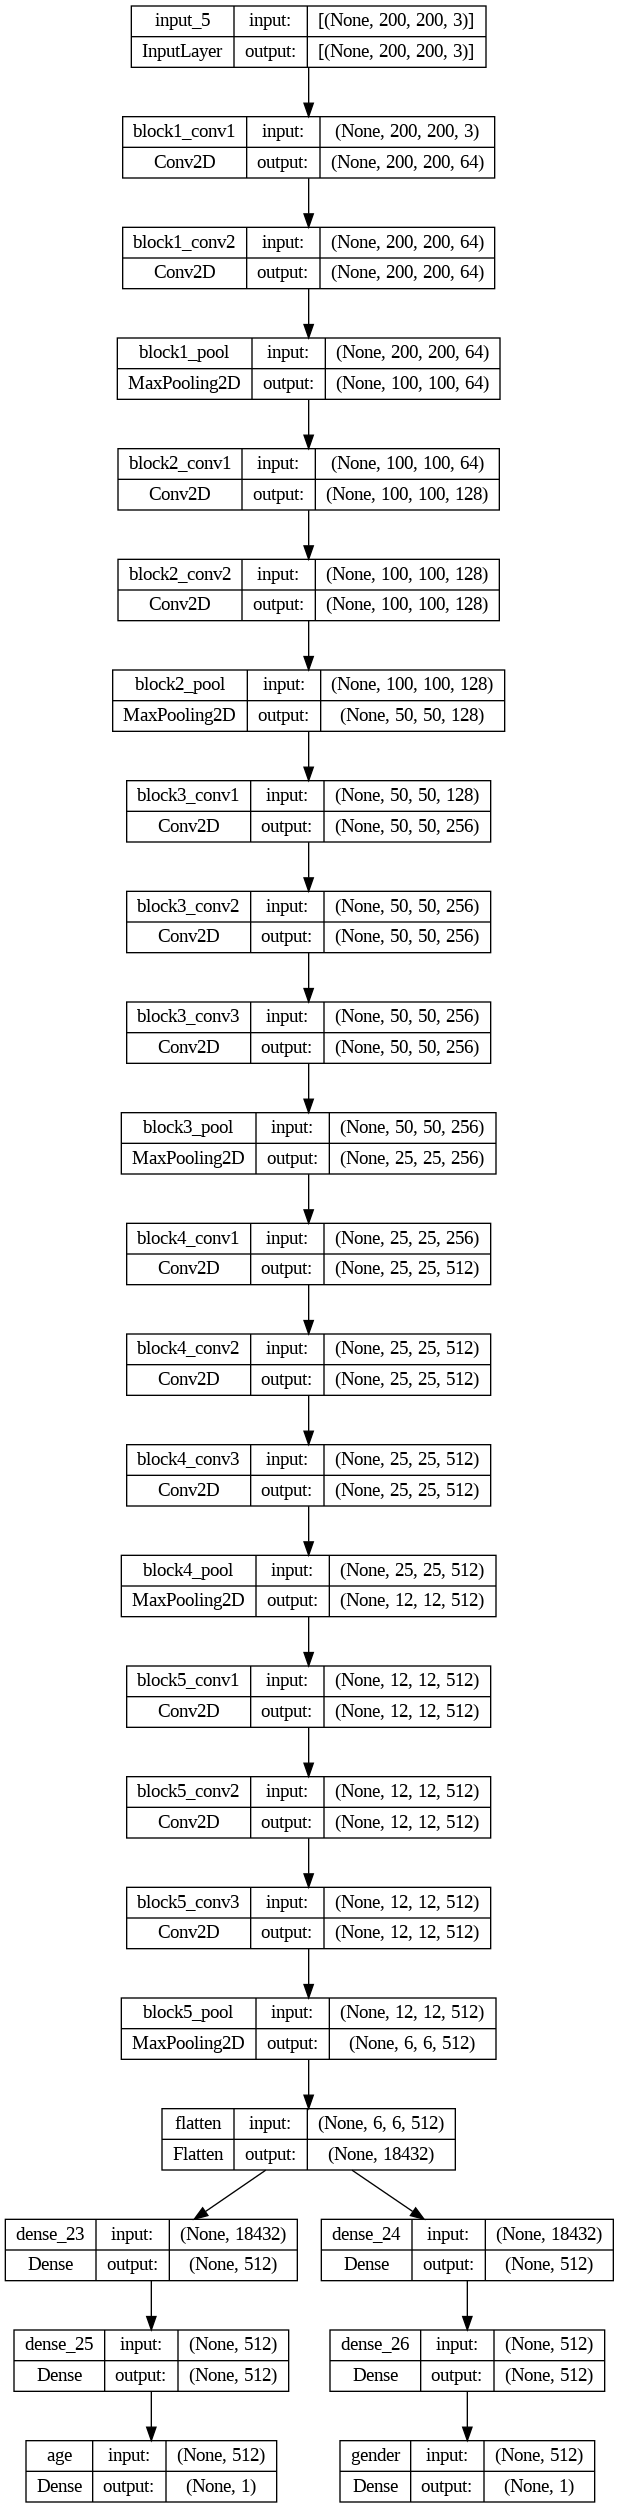

In [59]:
from keras.utils import plot_model
plot_model(model,show_shapes = True)

In [64]:
model.compile(optimizer='adam',
              loss=['mse', 'binary_crossentropy'],
              metrics={'age': 'mae', 'gender': 'accuracy'},
              loss_weights={'age': 1, 'gender': 99})
